## Extra Trees Classifier

Is used to find the most important features. Once we find the feature importance, we can then select the features and then build ML models.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

### An example
In the first example we look at a classification problem. 
Considering the preprocessed titanic data set.


In [17]:
unpickled_df = pd.read_pickle("titanic_dataframe.pk")

df = unpickled_df

print(df.columns)


dfx = df[["Age", "Gender", "family_size", "Embarked"]].copy(deep=True)
y = df["Survived"].copy(deep=True)

print(type(dfx))
print(type(y))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


In [19]:
df["Fare"].isnull().sum()

0

In [20]:
df.shape

(891, 13)

In [21]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

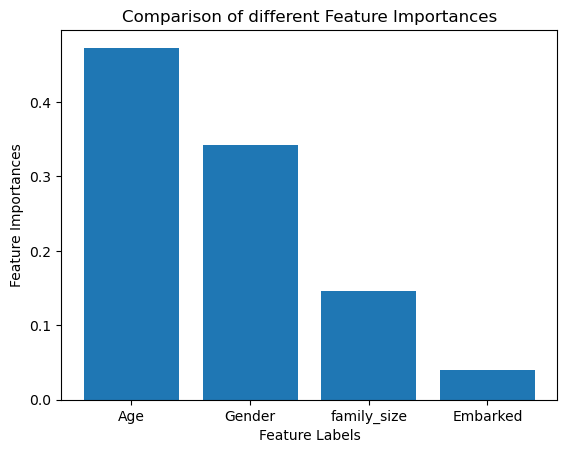

In [22]:
# Building the model

X = df[["Age", "Gender", "family_size", "Embarked"]].copy(deep=True)

extra_tree_forest = ExtraTreesClassifier(n_estimators = 10, criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X,y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance) 
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [23]:
print(feature_importance)

[0.47311435 0.34207823 0.14548324 0.03932418]


[0.35440407 0.28724566 0.24063167 0.09154305 0.02617555]


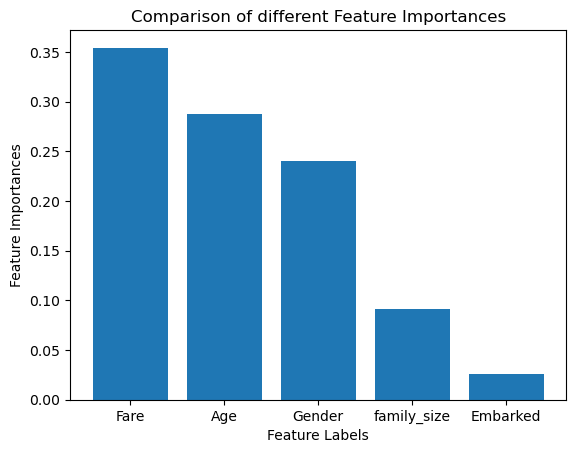

In [24]:
# Building the model

X = df[["Fare", "Age", "Gender", "family_size", "Embarked"]].copy(deep=True)

extra_tree_forest = ExtraTreesClassifier(n_estimators = 10, criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X,y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

print(feature_importance)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance) 
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

## Conclusion

From the Extra Trees Classifier, we can say that Age, Gender and family_size seem to be significant. 

### Another feature selection method:
    
    SelectKBest
    
    References:
    
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [25]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

selector = SelectKBest(chi2, k=2)
selector.fit(X, y)

X_new = selector.transform(X)
print(X_new.shape)

X.columns[selector.get_support(indices=True)]

# 1st way to get the list
vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names)

#2nd way
X.columns[selector.get_support(indices=True)].tolist()

(150, 2)
['petal length (cm)', 'petal width (cm)']


['petal length (cm)', 'petal width (cm)']